In [99]:
import numpy as np
import pandas as pd

import thinkstats2
import thinkplot
import nsfg
import relay

### PMF (probability mass function)

In [3]:
pmf = thinkstats2.Pmf([1,2,2,3,5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [4]:
pmf.Prob(2)

0.4

In [6]:
pmf[2]

0.4

In [7]:
pmf.Incr(2, 0.2)
pmf.Prob(2)

0.6000000000000001

In [8]:
pmf.Mult(2, 0.5)
pmf.Prob(2)

0.30000000000000004

In [9]:
pmf.Total()

0.8999999999999999

In [10]:
pmf.Normalize()
pmf.Total()

1.0

### Plotting PMFs

In [14]:
preg = nsfg.ReadFemPreg(dct_file='data/2002FemPreg.dct', dat_file='data/2002FemPreg.dat.gz')
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [21]:
first_pmf = thinkstats2.Pmf(firsts.prglngth)
other_pmf = thinkstats2.Pmf(others.prglngth)

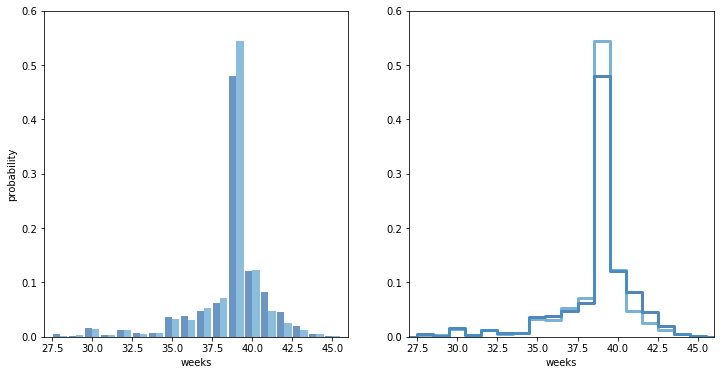

In [23]:
width = 0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='weeks', 
                 ylabel='probability', 
                 axis=[27, 46, 0, 0.6])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Show(xlabel='weeks', axis=[27, 46, 0, 0.6])

The biggest differences in the distributions are near the mode. Let's zoom in on that.

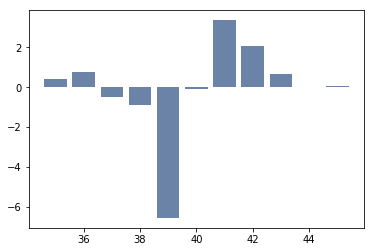

In [27]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)

### The class size paradox

In [28]:
'''
size       count
 5- 9          8
10-14          8
15-19         14
20-24          4
25-29          6
30-34         12
35-39          8
40-44          3
45-49          2
'''

d = {
    7: 8,
    12: 8,
    17: 14,
    22: 4,
    27: 6,
    32: 12,
    37: 8,
    42: 3,
    47: 2
}

pmf = thinkstats2.Pmf(d, label='actual')
print('mean', pmf.Mean())

mean 23.6923076923077


In [29]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

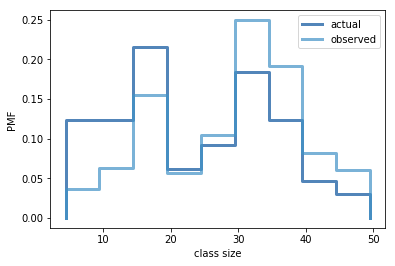

In [30]:
biased_pmf = BiasPmf(pmf, label='observed')

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')

In [31]:
def UnbiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, 1.0/x)
        
    new_pmf.Normalize()
    return new_pmf

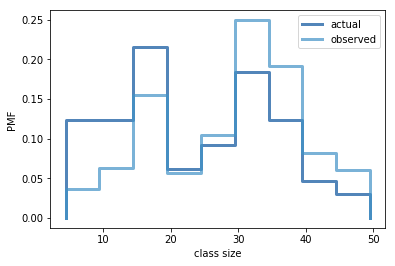

In [33]:
unbiased_pmf = UnbiasPmf(biased_pmf, label='actual')

thinkplot.PrePlot(2)
thinkplot.Pmfs([unbiased_pmf, biased_pmf])
thinkplot.Show(xlabel='class size', ylabel='PMF')

### DataFrame indexing

In [35]:
array = np.random.randn(4, 2)
df = pd.DataFrame(array)
df

,0,1
0,-0.433422,-0.412193
1,0.194295,0.900626
2,-1.497368,2.261809
3,0.459563,1.395703


In [36]:
columns = ['A', 'B']
df = pd.DataFrame(array, columns=columns)
df

,A,B
0,-0.433422,-0.412193
1,0.194295,0.900626
2,-1.497368,2.261809
3,0.459563,1.395703


In [37]:
index = ['a', 'b', 'c', 'd']
df = pd.DataFrame(array, columns=columns, index=index)
df

,A,B
a,-0.433422,-0.412193
b,0.194295,0.900626
c,-1.497368,2.261809
d,0.459563,1.395703


Simple indexing selects a column, returning a Series.

In [38]:
df['A']

a   -0.433422
b    0.194295
c   -1.497368
d    0.459563
Name: A, dtype: float64

To select a row by label, use <b>loc</b> attribute, which returns a Series.

In [39]:
df.loc['a']

A   -0.433422
B   -0.412193
Name: a, dtype: float64

If you know the integer positionof row, rather than its label, use <b>iloc</b> attribute, which also returns a Series.

In [40]:
df.iloc[0]

A   -0.433422
B   -0.412193
Name: a, dtype: float64

<b>loc</b> can also take a list of labels, which returns DataFrame.

In [41]:
indices = ['a', 'c']
df.loc[indices]

,A,B
a,-0.433422,-0.412193
c,-1.497368,2.261809


You can use a slice to select a range of rows by label.

In [42]:
df['a':'c']

,A,B
a,-0.433422,-0.412193
b,0.194295,0.900626
c,-1.497368,2.261809


In [43]:
df[0:2]

,A,B
a,-0.433422,-0.412193
b,0.194295,0.900626


### Exercises

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [46]:
resp = nsfg.ReadFemResp(dct_file='data/2002FemResp.dct', 
                        dat_file='data/2002FemResp.dat.gz')

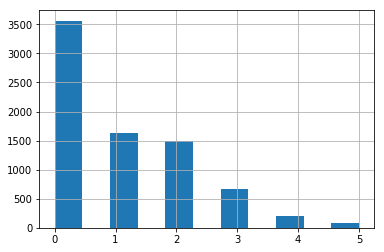

In [53]:
resp.numkdhh.hist(bins=11)

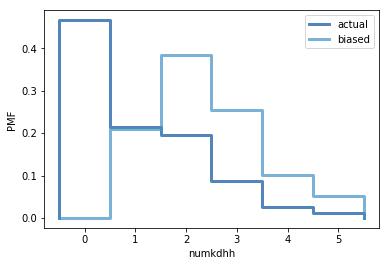

In [54]:
numkdhh_pmf = thinkstats2.Pmf(resp.numkdhh, label='actual')

biased_numkdhh_pmf = BiasPmf(numkdhh_pmf, label='biased')

thinkplot.PrePlot(2)
thinkplot.Pmfs([numkdhh_pmf, biased_numkdhh_pmf])
thinkplot.Show(xlabel='numkdhh', ylabel='PMF')

In [55]:
print('actual mean', numkdhh_pmf.Mean())
print('biased mean', biased_numkdhh_pmf.Mean())

actual mean 1.024205155043831
biased mean 2.403679100664282


In [59]:
def PmfMean(pmf):
    px = 0
    for x, p in pmf.Items():
        px += x * p
    
    return px

In [61]:
numkdhh_pmf.Mean() == PmfMean(numkdhh_pmf)

True

In [62]:
def PmfVar(pmf):
    mean = pmf.Mean()
    var = 0
    for x, p in pmf.Items():
        var += p * (x - mean) ** 2
    
    return var

In [63]:
numkdhh_pmf.Var() == PmfVar(numkdhh_pmf)

True

I started this book with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two live births and compute pairwise differences. Does this formulation of the question yield a different result?

In [75]:
prgmap = nsfg.MakePregMap(live)
multi_prgmap = {k: v for k, v in prgmap.items() if len(v) >= 2}

In [98]:
diffs = []
for cid, indices in multi_prgmap.items():
    first_prglngth = live.loc[indices[0]].prglngth
    others_prglngth = live.loc[indices[1]].prglngth.mean()
    diff = first_prglngth - others_prglngth
    diffs.append(diff)

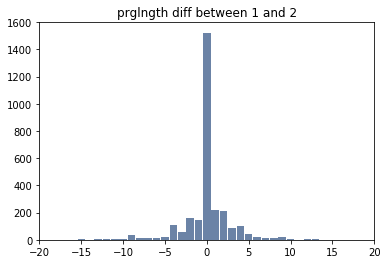

In [97]:
hist = thinkstats2.Hist(diffs)
thinkplot.Hist(hist)
thinkplot.Show(xlim=[-20, 20], title='prglngth diff between 1 and 2')

In most foot races, everyone starts at the same time. If you are a fast runner, you usually pass a lot of people at the beginning of the race, but after a few miles everyone around you is going at the same speed.
When I ran a long-distance (209 miles) relay race for the first time, I noticed an odd phenomenon: when I overtook another runner, I was usually much faster, and when another runner overtook me, he was usually much faster.

At first I thought that the distribution of speeds might be bimodal; that is, there were many slow runners and many fast runners, but few at my speed.

Then I realized that I was the victim of a bias similar to the effect of class size. The race was unusual in two ways: it used a staggered start, so teams started at different times; also, many teams included runners at different levels of ability.

As a result, runners were spread out along the course with little relationship between speed and location. When I joined the race, the runners near me were (pretty much) a random sample of the runners in the race.

So where does the bias come from? During my time on the course, the chance of overtaking a runner, or being overtaken, is proportional to the difference in our speeds. I am more likely to catch a slow runner, and more likely to be caught by a fast runner. But runners at the same speed are unlikely to see each other.

Write a function called `ObservedPmf` that takes a `Pmf` representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new `Pmf` representing the distribution of runners’ speeds as seen by the observer.

To test your function, you can use `relay.py`, which reads the results from the James Joyce Ramble 10K in Dedham MA and converts the pace of each runner to mph.

Compute the distribution of speeds you would observe if you ran a relay race at 7 mph with this group of runners.

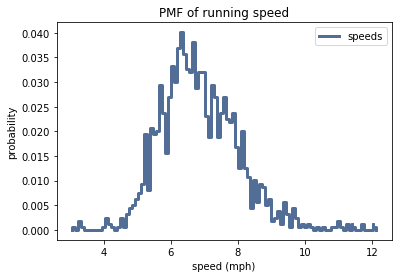

In [100]:
results = relay.ReadResults()
speeds = relay.GetSpeeds(results)

speeds = relay.BinData(speeds, 3, 12, 100)

pmf = thinkstats2.Pmf(speeds, 'speeds')
thinkplot.Pmf(pmf)
thinkplot.Show(title='PMF of running speed',
               xlabel='speed (mph)',
               ylabel='probability')

In [104]:
def ObservedPmf(pmf, runner_speed, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, np.abs(x - runner_speed))
    
    new_pmf.Normalize()
    return new_pmf

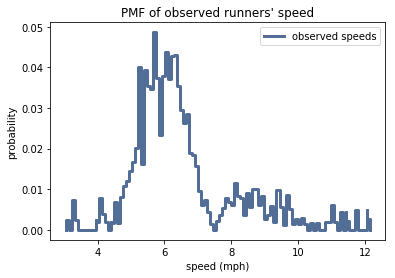

In [107]:
observed_pmf = ObservedPmf(pmf, 7.5, 'observed speeds')
thinkplot.Pmf(observed_pmf)
thinkplot.Show(title='PMF of observed runners\' speed',
               xlabel='speed (mph)',
               ylabel='probability')